In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import patches
from tqdm import tqdm
from scipy import special
from sklearn import linear_model

In [3]:
def gaussian3d(x0, y0, z0, sx, sy, sz, bx_min, by_min, bz_min, bx_max, by_max, bz_max):
    fx = special.erf((bx_max - x0) / (sqrt2 * sx)) - special.erf((bx_min - x0) / (sqrt2 * sx))
    fy = special.erf((by_max - y0) / (sqrt2 * sy)) - special.erf((by_min - y0) / (sqrt2 * sy))
    fz = special.erf((bz_max - z0) / (sqrt2 * sz)) - special.erf((bz_min - z0) / (sqrt2 * sz))

    return 0.125 * fx * fy * fz

In [4]:
def box_intersect2(k, l, i):
    ax = max(bound.iloc[k]['gr_min'], bound.iloc[l]['gr_min'])
    bx = min(bound.iloc[k]['gr_max'], bound.iloc[l]['gr_max'])

    ay = max(bound.iloc[k]['iz_min'], bound.iloc[l]['iz_min'])
    by = min(bound.iloc[k]['iz_max'], bound.iloc[l]['iz_max'])

    az = max(bound.iloc[k]['gi_min'], bound.iloc[l]['gi_min'])
    bz = min(bound.iloc[k]['gi_max'], bound.iloc[l]['gi_max'])

    inter_area = gaussian3d(sdss.iloc[i]['gr'], sdss.iloc[i]['iz'], sdss.iloc[i]['gi'],
                            sdss.iloc[i]['grErr'], sdss.iloc[i]['izErr'], sdss.iloc[i]['giErr'],
                            ax, ay, az, bx, by, bz)

    return inter_area

In [5]:
bound = pd.read_csv('./data/bound_under_work.csv')
complex_list = bound['class'].tolist()
complex_list.append('U')
sdss_list = []
for item in complex_list:
    sdss_list.append('c' + item)
markers = np.array(['.', '+', 'x', 'v', '^', '1', '2', '3', '4', 's', '*'])    
print(sdss_list)


['cC', 'cS', 'cB', 'cL', 'cD', 'cK', 'cX', 'cQ', 'cV', 'cA', 'cU']


In [6]:
path = '/mnt/Data/sdss/'
sdss1 = pd.read_csv(f'{path}init/sso_tot3jb3.csv', nrows=2000000)
sdss1['gr'] = sdss1['psfMag_g'] - sdss1['psfMag_r']
sdss1['grErr'] = np.sqrt(sdss1['psfMagErr_g'] ** 2 + sdss1['psfMagErr_r'] ** 2)
sdss1['iz'] = sdss1['psfMag_i'] - sdss1['psfMag_z']
sdss1['izErr'] = np.sqrt(sdss1['psfMagErr_i'] ** 2 + sdss1['psfMagErr_z'] ** 2)
sdss1['gi'] = sdss1['psfMag_g'] - sdss1['psfMag_i']
sdss1['giErr'] = np.sqrt(sdss1['psfMagErr_g'] ** 2 + sdss1['psfMagErr_i'] ** 2)
# print(sdss)
sqrt2 = np.sqrt(2.0)

In [7]:
err = 0.05
cond = (sdss1['grErr'] < err) & (sdss1['izErr'] < err) & (sdss1['giErr'] < err)
sdss = sdss1[cond]
sdss

,objID,run,rerun,camcol,field,ra,dec,tai_u,tai_g,tai_r,...,cV,cA,cU,complex,group_complex,ngroup_complex,bknown,offset,bcomplex,bgroup_complex
0,1237662239076647024,3903,301,6,20,184.106161,11.051678,52756.119387,52756.121048,52756.117728,...,0.0,0.0,1.000000,U,U,10,True,1.823189,False,NaN
2,1237680240911908982,8095,301,1,275,356.192610,-8.621421,55119.185051,55119.186710,55119.183391,...,0.0,0.0,1.000000,U,U,10,True,2.461758,False,NaN
3,1237670358719004866,5794,301,2,122,133.635194,15.681195,53673.451384,53673.453045,53673.449724,...,0.0,0.0,1.000000,U,V,10,True,0.174590,False,False
4,8658200268951257168,6981,40,4,264,333.340748,0.093506,54365.199942,54365.201601,54365.198284,...,0.0,0.0,1.000000,U,U,10,True,3.186668,False,NaN
5,1237649742870413381,994,301,2,37,82.634519,2.440280,51457.463707,51457.465368,51457.462046,...,0.0,0.0,0.999911,S,S,7,True,2.360263,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436428,1237655693020562208,2379,301,5,187,237.150674,-0.947553,52075.227917,52075.229575,52075.226256,...,0.0,0.0,1.000000,U,B,10,True,2.177826,False,False
439251,1237667537467540296,5137,301,3,201,143.256057,18.889509,53405.236171,53405.237830,53405.234511,...,0.0,0.0,1.000000,U,U,10,True,3.407334,False,NaN
441027,1237664089683920036,4334,301,5,222,74.611877,26.158088,52994.216357,52994.218015,52994.214697,...,0.0,0.0,1.000000,U,S,10,True,3.053470,False,True
457397,1237661971186975534,3841,301,3,156,188.318188,7.067007,52730.275058,52730.276716,52730.273398,...,0.0,0.0,1.000000,U,S,10,True,2.557580,False,True


In [9]:
areas_gauss = np.zeros(shape=(sdss.__len__(), bound.__len__() + 1), dtype=np.float)
taxo_gauss = pd.DataFrame(columns=complex_list)

for i in tqdm(range(sdss.__len__())):
#     if i % 1000 == 0:
#         print(i)
        # print(i, end=', ')
    for j in range(bound.__len__()):
        areas_gauss[i, j] = gaussian3d(sdss.iloc[i]['gr'], sdss.iloc[i]['iz'], sdss.iloc[i]['gi'],
                                       sdss.iloc[i]['grErr'], sdss.iloc[i]['izErr'], sdss.iloc[i]['giErr'],
                                       bound.iloc[j]['gr_min'], bound.iloc[j]['iz_min'], bound.iloc[j]['gi_min'],
                                       bound.iloc[j]['gr_max'], bound.iloc[j]['iz_max'], bound.iloc[j]['gi_max'])

    kx_area = box_intersect2(5, 6, i)  # K X
    if kx_area > 0:
        areas_gauss[i, 5] -= kx_area

    cx_area = box_intersect2(0, 6, i)  # C X
    if cx_area > 0:
        areas_gauss[i, 0] -= cx_area

    sk_area = box_intersect2(1, 5, i)  # S - (K - X)
    if sk_area > 0:
        areas_gauss[i, 1] -= (sk_area - kx_area)

    sx_area = box_intersect2(1, 6, i)  # S X
    if sx_area > 0:
        areas_gauss[i, 1] -= sx_area

    sq_area = box_intersect2(1, 7, i)  # S Q
    if sq_area > 0:
        areas_gauss[i, 1] -= sq_area

    ld_area = box_intersect2(3, 4, i)  # L D
    if ld_area > 0:
        areas_gauss[i, 3] -= ld_area

    if np.isnan(areas_gauss[i]).any():
        taxo_gauss.loc[i] = list(np.zeros(bound.__len__() + 1, dtype=np.float))
        taxo_gauss.iloc[i, -1] = 1.0
    else:
        areas_gauss[i, -1] = abs(1.0 - np.sum((areas_gauss[i, :-1])))
        taxo_gauss.loc[i] = list((areas_gauss[i]))

# print(taxo_gauss)


100%|██████████| 78126/78126 [37:20<00:00, 34.87it/s] 


In [10]:
a5 = taxo_gauss.iloc[:,:-1].idxmax(axis=1).to_numpy()
c5 = taxo_gauss.iloc[:,:-1].max(axis=1)
cond = c5 > 0.5
a5[~cond] = 'U'
b5 = np.array([complex_list.index(x) for x in a5])
col = bound['color']
col.loc[10] = 'black'
colors5 = col[b5]

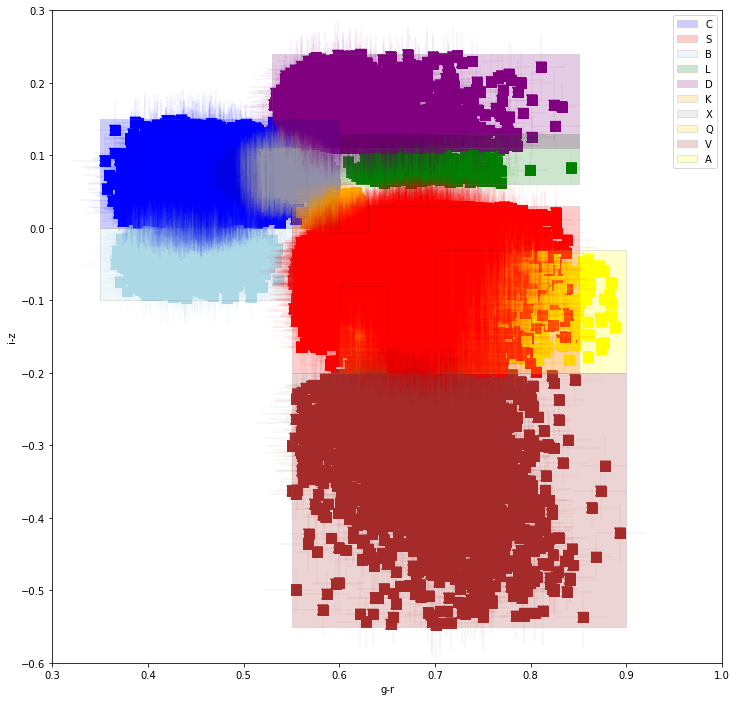

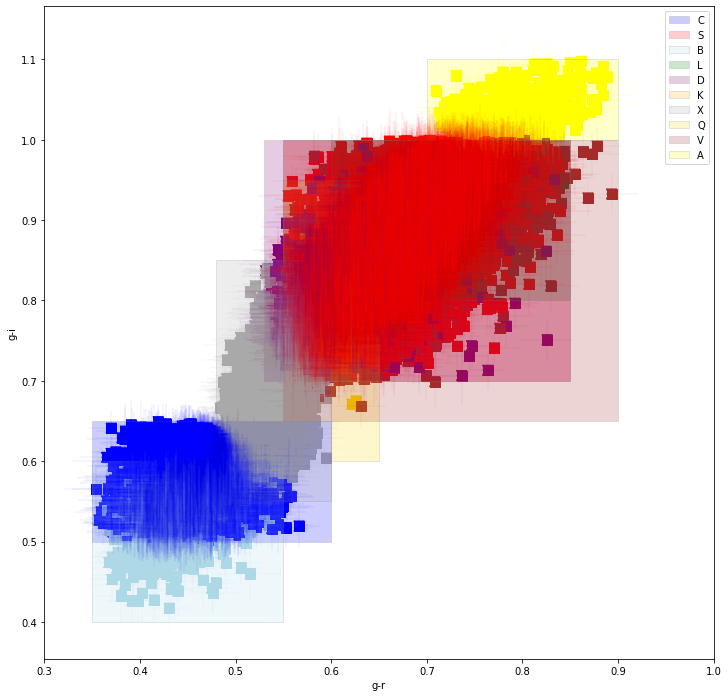

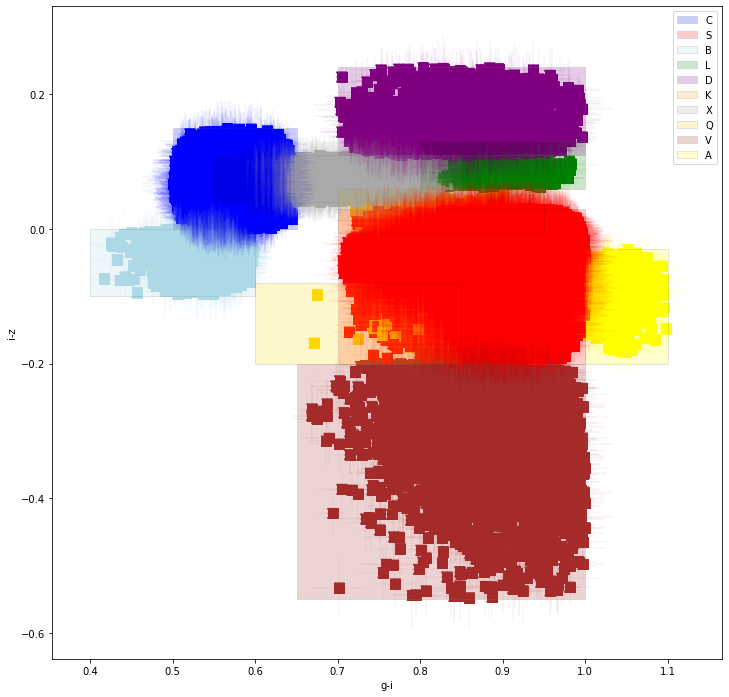

In [16]:
# miss = ['U', 'V', 'D', 'S']
miss = ['U']
cond5 = ~np.isin(a5, miss)
# print(taxo_point[cond3])
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
# cond4 = (cond3 == False) & (cond2 == True)
ax.errorbar(x=sdss['gr'][cond5], y=sdss['iz'][cond5],
            xerr=sdss['grErr'][cond5], yerr=sdss['izErr'][cond5], 
            fmt='.', alpha=0.05, color='none', ecolor=colors5[cond5])

for i in range(10):
    cond = (b5 == i)
    if np.isin(np.array(complex_list[i]), miss):
        continue
    ax.scatter(x=sdss['gr'][cond5], y=sdss['iz'][cond5], alpha=1.0, color=colors5[cond5], s=100, 
               marker=markers[i])

for i in range(bound.__len__()):
    rec12 = patches.Rectangle((bound.iloc[i]['gr_min'], bound.iloc[i]['iz_min']),
                                  (bound.iloc[i]['gr_max'] - bound.iloc[i]['gr_min']),
                                  (bound.iloc[i]['iz_max'] - bound.iloc[i]['iz_min']),
                                  linewidth=1,
                                  edgecolor='grey', facecolor=col[i],
                                  alpha=0.2, label=f'{complex_list[i]}'
                                  )
    ax.add_patch(rec12)

ax.set_xlabel('g-r')
ax.set_ylabel('i-z')
ax.set_xlim(0.3, 1.0)
ax.set_ylim(-0.6, 0.3)
ax.legend()
plt.show()

plt.figure(figsize=(12,12))
ax = plt.subplot(111)
ax.errorbar(x=sdss['gr'][cond5], y=sdss['gi'][cond5],
            xerr=sdss['grErr'][cond5], yerr=sdss['giErr'][cond5], 
            fmt='.', color='none', alpha=0.05, ecolor=colors5[cond5])

for i in range(10):
    cond = (b5 == i)
    if np.isin(np.array(complex_list[i]), miss):
        continue
    ax.scatter(x=sdss['gr'][cond5], y=sdss['gi'][cond5], alpha=1.0, color=colors5[cond5], s=100, 
               marker=markers[i])

for i in range(bound.__len__()):
    rec12 = patches.Rectangle((bound.iloc[i]['gr_min'], bound.iloc[i]['gi_min']),
                                  (bound.iloc[i]['gr_max'] - bound.iloc[i]['gr_min']),
                                  (bound.iloc[i]['gi_max'] - bound.iloc[i]['gi_min']),
                                  linewidth=1,
                                  edgecolor='grey', facecolor=col[i],
                                  alpha=0.2, label=f'{complex_list[i]}'
                                  )
    ax.add_patch(rec12)

ax.set_xlabel('g-r')
ax.set_ylabel('g-i')
ax.set_xlim(0.3, 1.0)
# ax.set_ylim(-0.6, 0.3)
ax.legend()

plt.figure(figsize=(12,12))
ax = plt.subplot(111)
ax.errorbar(x=sdss['gi'][cond5], y=sdss['iz'][cond5],
            xerr=sdss['giErr'][cond5], yerr=sdss['izErr'][cond5], 
            fmt='.', alpha=0.05, color='none', ecolor=colors5[cond5])

for i in range(10):
    cond = (b5 == i)
    if np.isin(np.array(complex_list[i]), miss):
        continue
    ax.scatter(x=sdss['gi'][cond5], y=sdss['iz'][cond5], alpha=1.0, color=colors5[cond5], s=100, 
               marker=markers[i])

for i in range(bound.__len__()):
    rec12 = patches.Rectangle((bound.iloc[i]['gi_min'], bound.iloc[i]['iz_min']),
                                  (bound.iloc[i]['gi_max'] - bound.iloc[i]['gi_min']),
                                  (bound.iloc[i]['iz_max'] - bound.iloc[i]['iz_min']),
                                  linewidth=1,
                                  edgecolor='grey', facecolor=col[i],
                                  alpha=0.2, label=f'{complex_list[i]}'
                                  )
    ax.add_patch(rec12)


ax.set_xlabel('g-i')
ax.set_ylabel('i-z')
ax.legend()


In [34]:
sun={'g-u':-1.4, 'g-r':0.45, 'r-i':0.12, 'i-z':0.04, 
     'g-i':0.55, 'g-z':0.61}
wave = [0.3551, 0.4686, 0.6166, 0.7480, 0.8932]
wave_label = ['u', 'g', 'r', 'i', 'z']
dico = {'A': ['A'], 
        'B': ['B'], 
        'C': ['C', 'Cb', 'Cg', 'Ch', 'Cgh'],
        'D': ['D'], 
        'K': ['K'], 
        'L': ['L'], 
        'Q': ['Q'], 
        'S': ['S', 'Sa', 'Sq', 'Sr', 'Sv'],
        'X': ['X', 'Xc', 'Xe', 'Xk', 'Xn'],
        'V': ['V'] }

In [28]:
sdss.loc[:, 'complex'] = list(a5)

In [32]:
sdss['complex'].value_counts()

U    30126
S    29753
C     6078
V     3792
X     2850
D     2415
B     1730
A      459
L      423
K      402
Q       98
Name: complex, dtype: int64

In [20]:
bound

,class,gr_min,gr_max,iz_min,iz_max,gi_min,gi_max,color
0,C,0.35,0.60,0.000,0.15,0.50,0.65,blue
1,S,0.55,0.85,-0.200,0.03,0.70,1.00,red
2,B,0.35,0.55,-0.100,0.00,0.40,0.60,lightblue
3,L,0.60,0.85,0.060,0.13,0.80,1.00,green
4,D,0.53,0.85,0.110,0.24,0.70,1.00,purple
5,K,0.55,0.63,-0.006,0.06,0.70,0.95,orange
6,X,0.48,0.60,0.040,0.11,0.55,0.85,darkgray
7,Q,0.60,0.65,-0.200,-0.08,0.60,0.85,gold
8,V,0.55,0.90,-0.550,-0.20,0.65,1.00,brown
9,A,0.70,0.90,-0.200,-0.03,1.00,1.10,yellow


C    6078   78126  7.78
S   29753   78126 38.08
B    1730   78126  2.21
L     423   78126  0.54
D    2415   78126  3.09
K     402   78126  0.51
X    2850   78126  3.65
Q      98   78126  0.13
V    3792   78126  4.85
A     459   78126  0.59


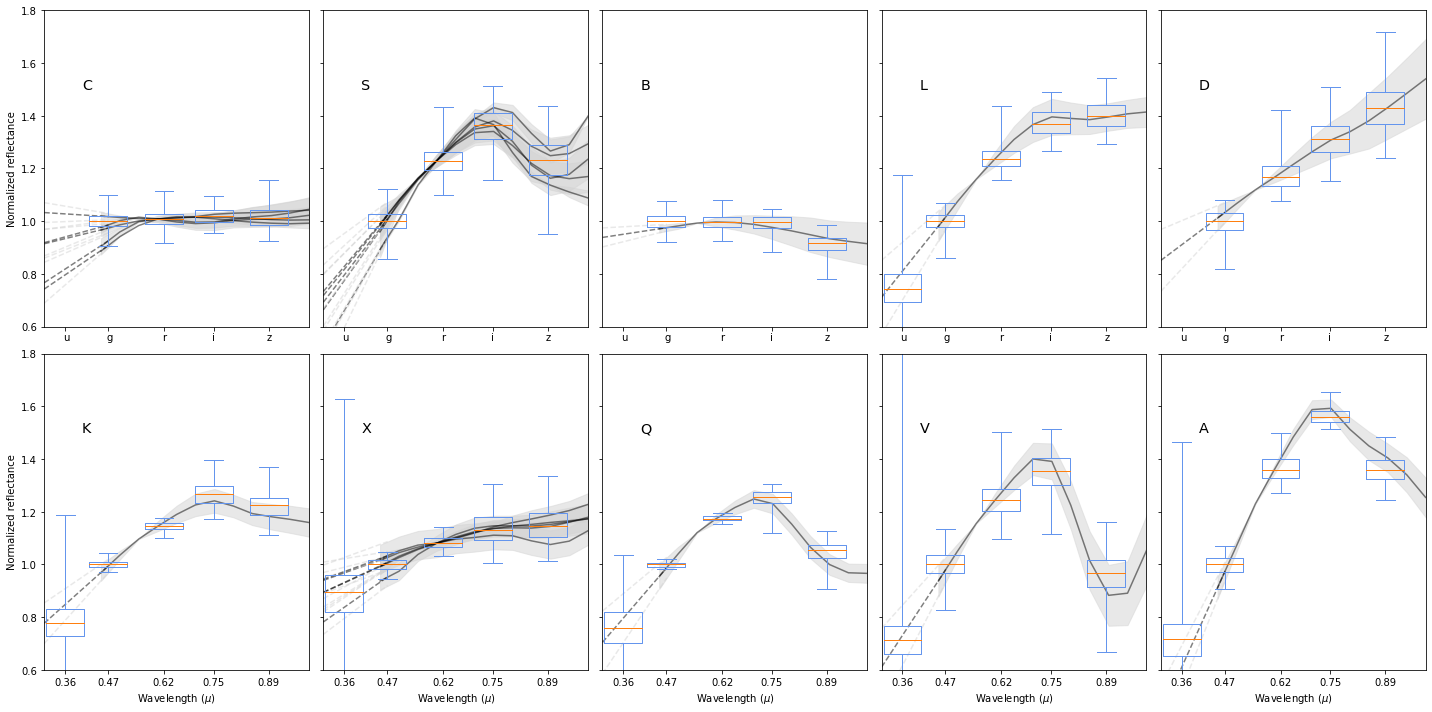

In [39]:
fig, ax = plt.subplots(2, 5, figsize=(20,10), sharex='all', sharey='all')
fax = ax.ravel()
for i in range(bound.__len__()):
    curClass = bound['class'][i]

    sso = sdss[sdss['complex']==curClass]
    print('{:1s} {:7d} {:7d} {:5.2f}'.format(
            curClass, len(sso), len(sdss), 100*float(len(sso))/len(sdss)))
    
    flux_u = 10**(-0.4*( sso['psfMag_u']-sso['psfMag_g'] - (-sun['g-u']) ))
    flux_r = 10**(-0.4*( sso['psfMag_r']-sso['psfMag_g'] - (-sun['g-r']) ))
    flux_i = 10**(-0.4*( sso['psfMag_i']-sso['psfMag_g'] - (-sun['g-i']) ))
    flux_z = 10**(-0.4*( sso['psfMag_z']-sso['psfMag_g'] - (-sun['g-z']) ))
    
    # g was used as reference for all -> recompute flux_g from r as reference
    flux_g = 10**(-0.4*( sso['psfMag_g']-sso['psfMag_r'] - ( sun['g-r']) )) \
           * np.median(flux_r)
    fluxes = [flux_u, flux_g, flux_r, flux_i, flux_z]

    loc = dico[curClass]
    for kC in range(len(loc)):
        bdm = pd.read_csv(f'data/bdm_class/class_{loc[kC]}.csv')
        bdm['Deviation'] *= (np.median(flux_r)/bdm['Average'][3])
        bdm['Average'] *= (np.median(flux_r)/bdm['Average'][3])

        line_X = np.asarray([0.3, 0.47]).reshape(-1,1)
        X = np.asarray(bdm['Wavelength'][0:3]).reshape(-1, 1)
        y = np.asarray(bdm['Average'][0:3]).reshape(-1, 1)
   
        linear = linear_model.LinearRegression()
        linear.fit(X, y)
        line_y = linear.predict(line_X)
        fax[i].plot(line_X, line_y, color='black', linestyle='--', alpha=0.5)
   
        if bdm['Deviation'][0]>0:
            dyp = np.asarray(bdm['Average'][0:3]+bdm['Deviation'][0:3]).reshape(-1, 1)
            dym = np.asarray(bdm['Average'][0:3]-bdm['Deviation'][0:3]).reshape(-1, 1)
            linear.fit(X, dyp)
            line_dy = linear.predict(line_X)
            fax[i].plot(line_X, line_dy, color='lightgray', linestyle='--', alpha=0.5)
        
            linear.fit(X, dym)
            line_dy = linear.predict(line_X)
            fax[i].plot(line_X, line_dy, color='lightgray', linestyle='--', alpha=0.5)
            fax[i].fill_between( bdm['Wavelength'], bdm['Average']-bdm['Deviation'], 
                                 bdm['Average']+bdm['Deviation'], color='lightgray', 
                                 alpha=0.5)
        fax[i].plot(bdm['Wavelength'], bdm['Average'], color='black', alpha=0.5)
 
    whisker = fax[i].boxplot(fluxes, positions=wave, whis=95, widths=0.1)
    plt.setp(whisker['boxes'], color='cornflowerblue')
    plt.setp(whisker['whiskers'], color='cornflowerblue')
    plt.setp(whisker['fliers'], color='cornflowerblue')
    plt.setp(whisker['caps'], color='cornflowerblue')

    fax[i].set_xlim([0.3, 1])
    fax[i].set_ylim([0.6, 1.8])
    fax[i].text(0.4, 1.5, curClass, fontsize='x-large')

    # fax[i].set_xlabel([])

    # for j, n in enumerate(wave_label):
    #     fax[i].text(wave[j], 1.7, n)

fig.canvas.draw()
# plt.subplots_adjust(left=0.125, bottom=0.05, right=0.95, top=0.98, wspace=None, hspace=0.001)

plt.setp(fax, xticks=wave, xticklabels=[f'{x:.2f}' for x in wave])
for i in range(5, 10):
    fax[i].set_xlabel(r'Wavelength ($\mu$)')

for i in range(5):
    for j in range(len(wave)):
        fax[i].text(wave[j]-0.005, 0.55, wave_label[j])

fax[0].set_ylabel('Normalized reflectance')
fax[5].set_ylabel('Normalized reflectance')

fig.tight_layout()
